<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/financial%20econometrics-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[10.66666667  7.91145833  5.625       3.77604167  2.33333333  1.265625
  0.54166667  0.13020833  0.          0.11979167  0.45833333  0.984375
  1.66666667  2.47395833  3.375       4.33854167  5.33333333  6.328125
  7.29166667  8.19270833  9.          9.68229167 10.20833333 10.546875
 10.66666667]


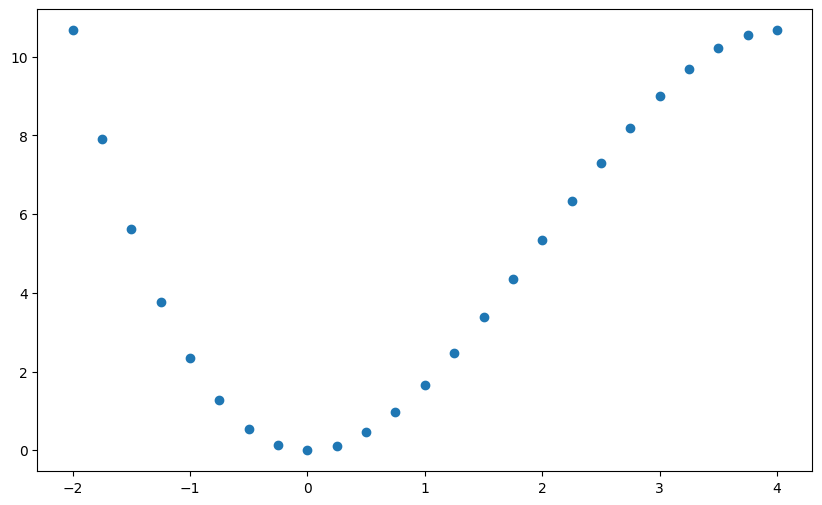

In [2]:
#OLS回歸
def f(x):
  return 2*x**2-x**3/3

x = np.linspace(-2,4,25) #創見連續數據點
y=f(x)
print(y)

plt.figure(figsize=(10,6))
plt.plot(x,y,'o')

In [3]:
#alpha & beta
beta = np.cov(x,y,ddof=0)[0,1]/np.var(x)     #ddof=degrees of freedom=0表示計算N 而非N-1
alpha = y.mean() - beta*x.mean()             #[0,1]表示取cov(x,y)
print(alpha,beta)

3.8625000000000003 1.0541666666666667


MSE= 10.721953125


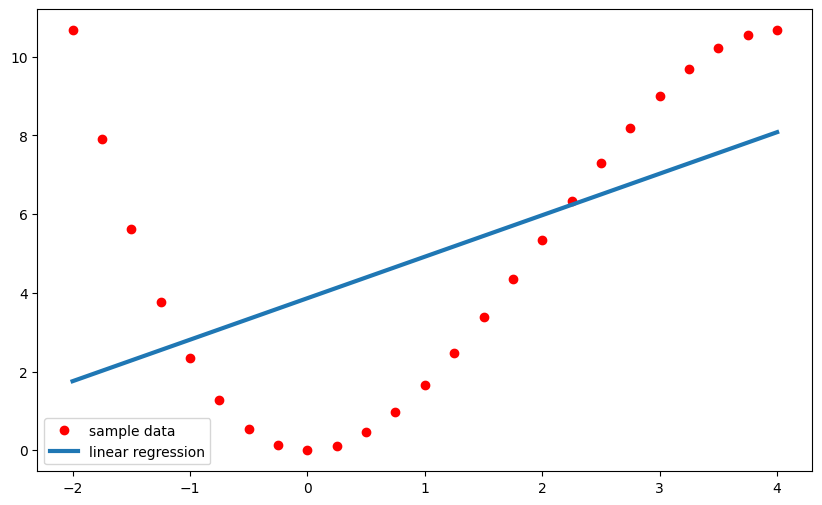

In [4]:
#估計
yhat = alpha + beta*x
MSE = ((y-yhat)**2).mean()
print('MSE=',MSE)

plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label='sample data')
plt.plot(x,yhat,lw=3.0,label='linear regression')
plt.legend()

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


array([-3.33333333e-01,  2.00000000e+00,  0.00000000e+00, -9.94759830e-15])

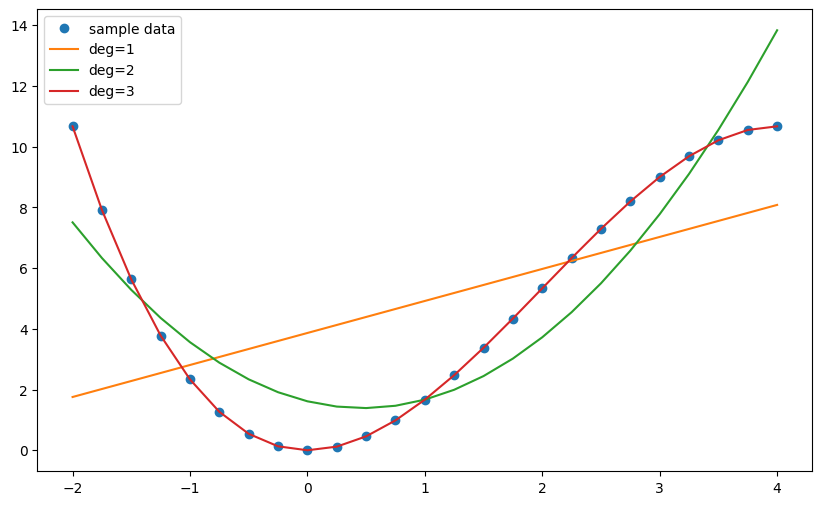

In [5]:
#增加次方數作為基底函數MSE可獲得改善
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',label='sample data')

for deg in [1,2,3]:
  reg = np.polyfit(x,y,deg)     #根據輸入x,y產出適合的回歸係數
  yhat = np.polyval(reg,x)      #從得到的回歸係數用x計算yhat

  MSE = ((y-yhat)**2).mean()
  print(f'deg={deg} | MSE={MSE:.5f}')
  plt.plot(x,np.polyval(reg,x),label=f'deg={deg}')

plt.legend()
reg


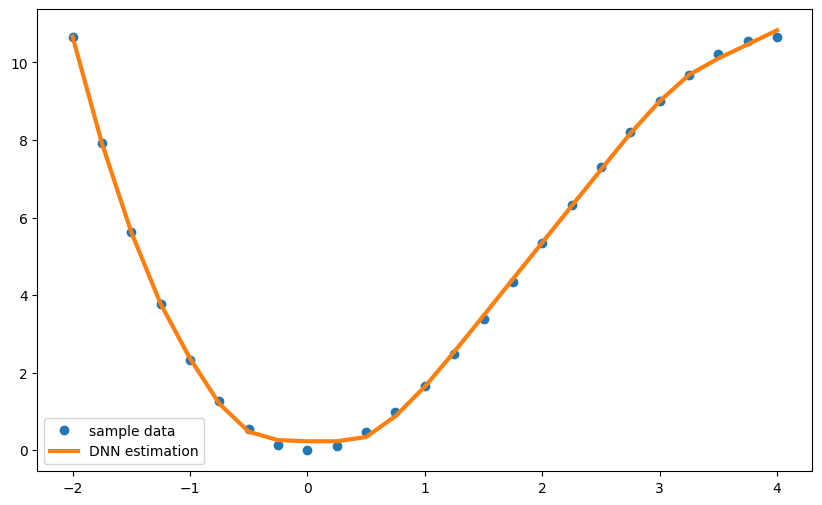

In [6]:
#用類神經網路估計
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3*[256],learning_rate_init=0.03,max_iter=5000)
model.fit(x.reshape(-1,1),y)   #-1根據另一個維度自行計算 1表示一維空間轉二維(n_sample,n_feature) 樣本n_feature為1個特徵
                               #y表示學習的目標

yhat = model.predict(x.reshape(-1,1))
MSE = ((y-yhat)**2).mean()

plt.figure(figsize=(10,6))
plt.plot(x,y,'o',label='sample data')
plt.plot(x,yhat,lw=3.0,label='DNN estimation')
plt.legend()

In [7]:
#keras深度學習sequential模型
import tensorflow as tf
tf.random.set_seed(100)

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()     #物件實體化
model.add(Dense(256,activation='relu',input_dim=1)) #加入修正線性單元活化函數的秘密連接隱藏層
model.add(Dense(1,activation='linear'))             #加入具有線性活化函數的輸出層
model.compile(loss='mse',optimizer='rmsprop')       #編譯模型;rmsprop優化器

((y-yhat)**2).mean()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.007468931068113416

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
round=1| MSE=2.50715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
round=2| MSE=0.59405
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
round=3| MSE=0.18283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
round=4| MSE=0.11500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
round=5| MSE=0.09888


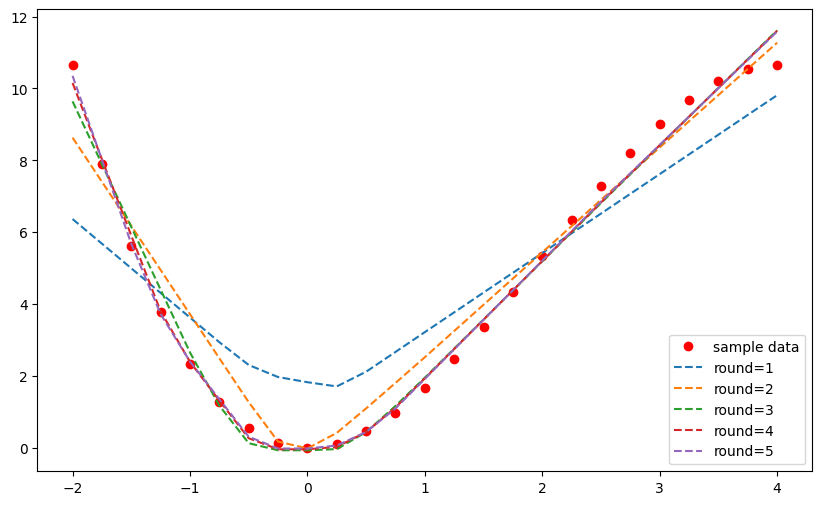

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label='sample data')

for i in range(1,6):
  model.fit(x,y,epochs=100,verbose=False)   #每次fit模型會在每次循環中進行100次epoch的訓練更新權重/對整個數據集 x 和 y 訓練 100 次，也就是模型對每個數據點進行 100 輪學習
  yhat = model.predict(x)
  MSE =  ((y-yhat.flatten())**2).mean()
  print(f'round={i}| MSE={MSE:.5f}')
  plt.plot(x,yhat,'--',label=f'round={i}')
plt.legend()


deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


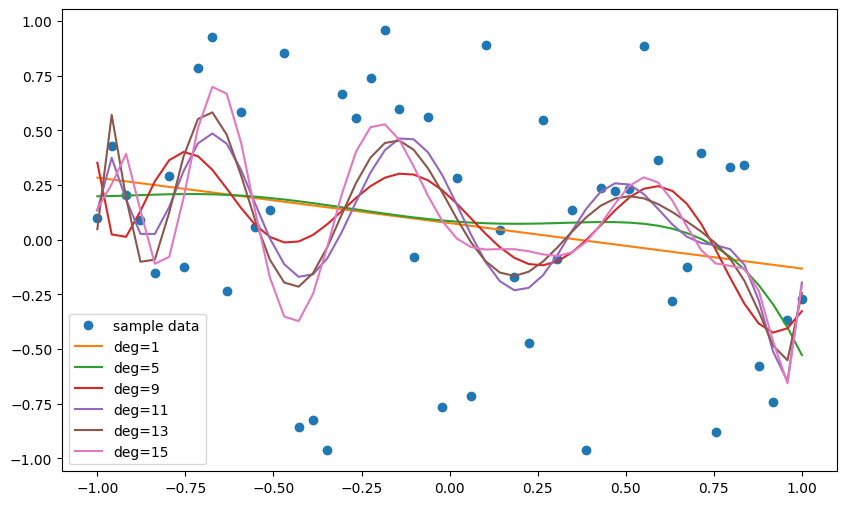

In [9]:
np.random.seed(0)
x = np.linspace(-1,1)
y = np.random.random(len(x))*2-1

plt.figure(figsize=(10,6))
plt.plot(x,y,'o',label='sample data')
for deg in [1,5,9,11,13,15]:
  reg = np.polyfit(x,y,deg=deg)
  yhat = np.polyval(reg,x)
  MSE = ((y-yhat)**2).mean()
  print(f'deg={deg:2d} | MSE={MSE:.5f}')
  plt.plot(x,np.polyval(reg,x),label=f'deg={deg}')

plt.legend()


In [10]:
model = Sequential()
model.add(Dense(256,activation='relu',input_dim=1))
for i in range(3):
  model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')   #均方誤差為損失函數;優化器用來最小化損失

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
round=1 | MSE=0.13075
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
round=2 | MSE=0.08945
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
round=3 | MSE=0.07910
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
round=4 | MSE=0.07255
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
round=5 | MSE=0.03666
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
round=6 | MSE=0.05190
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
round=7 | MSE=0.01285


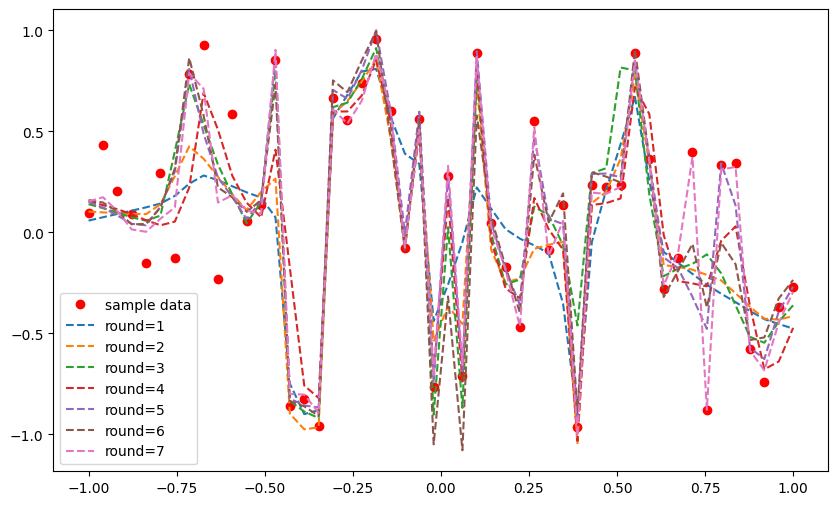

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label='sample data')
for i in range(1,8):
  model.fit(x,y,epochs=500,verbose=False)
  yhat = model.predict(x)

  MSE = ((y-yhat.flatten())**2).mean()
  print(f'round={i} | MSE={MSE:.5f}')
  plt.plot(x,yhat,'--',label=f'round={i}')

plt.legend()

x 是輸入特徵矩陣
x 是模型的自變量，包含樣本的特徵。每個樣本都有多個特徵，因此 x 是一個矩陣，其形狀通常為 (n_samples, n_features)，即：
n_samples：樣本數，也就是數據集中有多少個樣本。
n_features：每個樣本的特徵數，也就是每個樣本用多少個變量來描述。


y 是目標變量（一維數組）
y 是目標變量（標籤），對應於每個樣本的預測結果。對於分類或回歸問題，每個樣本只有一個標籤或目標值，因此 y 通常是一維數組，其形狀為 (n_samples,)，即：
每個樣本對應一個目標值。


x 是多特徵的輸入矩陣：因為每個樣本可以有多個特徵（例如房價預測中，每個房屋的面積、房間數、樓層等），所以 x 是一個矩陣，每行對應一個樣本，每列對應一個特徵。

y 是單一目標的一維數組：每個樣本只會有一個對應的目標變量（例如房價預測中的房價，或者分類問題中的標籤）。因此 y 是一個一維數組，對應每個樣本的預測結果。

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[ True  True  True  True False  True  True  True  True  True]


<Axes: >

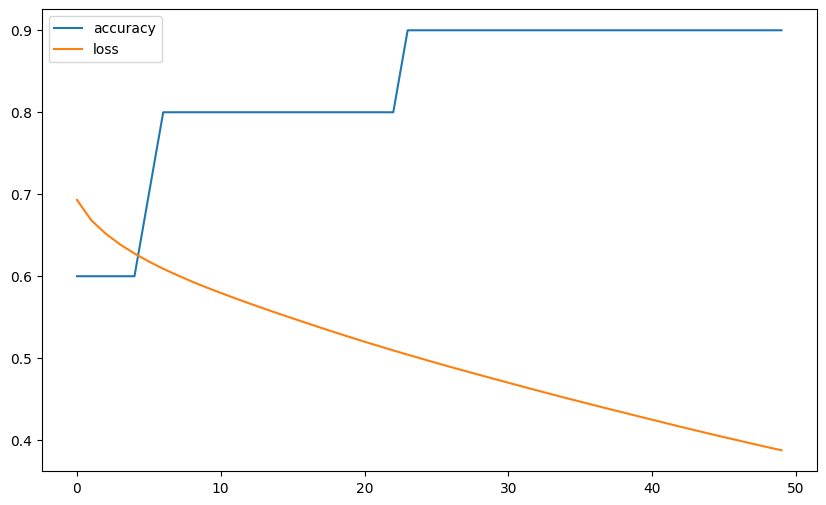

In [12]:
#神經網路處理二元分類問題
f = 5;n=10
np.random.seed(100)          #確保數值可重現
x = np.random.randint(0,2,(n,f))       #建立隨機特徵資料
y = np.random.randint(0,2,n)           #建立標籤資料

model = Sequential()
model.add(Dense(256,activation='relu',input_dim=f))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

h= model.fit(x,y,epochs=50,verbose=False)
yhat = np.where(model.predict(x).flatten() >0.5 ,1,0)

print(y==yhat) #比較預測資料與標籤資料

res = pd.DataFrame(h.history)
res.plot(figsize=(10,6))

 model.fit(x, y, epochs=50, verbose=False) 進行模型訓練時，Keras 會自動記錄：

loss：每個 epoch 訓練結束後的損失值（這裡是 binary_crossentropy，適用於二元分類問題）。
accuracy：每個 epoch 訓練結束後的準確度（因為你在 compile 階段指定了 metrics=['accuracy']）。
這些數據會存儲在 h.history 中，並返回為一個字典，鍵是 loss 和 accuracy，值則是每個 epoch 對應的數值。

In [13]:
#增加樣本與特徵資料
f = 10;n=250
np.random.seed(100)

x= np.random.randint(0,2,(n,f))
print(x[:4])
y= np.random.randint(0,2,n)
print(y[:4])

print('樣式數量：',2**f)

[[0 0 1 1 1 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 1 1 1 0 0]
 [1 0 0 1 1 1 1 1 0 0]]
[0 1 0 0]
樣式數量： 1024


行（row） 是矩陣中的橫向數據，一行對應一個樣本。
列（column） 是矩陣中的縱向數據，一列對應一個特徵。
在數據科學中，矩陣形狀 (n_rows, n_columns) 通常表示為 (樣本數, 特徵數)，這種結構廣泛應用於機器學習和數據處理。

In [14]:
fcols= [f'f{i}'for i in range(f)]
data = pd.DataFrame(x,columns=fcols)
data['l'] = y
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [19]:
grouped = data.groupby(list(data.columns))
freq= grouped['l'].size().unstack(fill_value=0)
freq['sum'] = freq[0]+freq[1]
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [20]:
freq['sum'].describe().astype(int)

,sum
count,227
mean,1
std,0
min,1
25%,1
50%,1
75%,1
max,2


In [27]:
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=[128,128,128],max_iter=1000,random_state=100)
model.fit(data[fcols],data['l'])
accuracy_score(data['l'],model.predict(data[fcols]))      #fcols dataframe

split = int(len(data)*0.7)
train = data[:split]
test = data[split:]

model.fit(train[fcols],train['l'])
MLPClassifier(hidden_layer_sizes=[128,128,128],max_iter=1000,random_state=100)

print(accuracy_score(train['l'],model.predict(train[fcols])))  #insample準確度
print(accuracy_score(test['l'],model.predict(test[fcols])))   #outsample準確度

0.9714285714285714
0.38666666666666666


train['l']：是用於訓練模型的數據，你可以用它來計算模型的內部樣本準確度。


test['l']：是用來測試模型的數據，這是模型未見過的數據，因此使用 test['l'] 能夠反映模型的泛化能力，也就是模型在新數據上的表現。

In [29]:
#大資料集
factor=50
big = pd.DataFrame(np.random.randint(0,2,(factor*(n,f))),columns=fcols)
big['l']=np.random.randint(0,2,factor*n)

train = big[:split]
test = big[split:]

model.fit(train[fcols],train['l'])
MLPClassifier(hidden_layer_sizes=(128,128,128),max_iter=1000,random_state=100)

print(accuracy_score(train['l'],model.predict(train[fcols])))
print(accuracy_score(test['l'],model.predict(test[fcols])))

grouped = big.groupby(list(big.columns))
freq= grouped['l'].size().unstack(fill_value=0)
freq['sum']=freq[0]+freq[1]
freq.head()

#資料集超過numpy的維度上限32!!

ValueError: maximum supported dimension for an ndarray is 32, found 100